# TCGA-AB_2828 v15 vs v32 GDC Published counts analysis

Analysis includes combining counts for v15 and v32 for [TCGA-AB-2828](https://portal.gdc.cancer.gov/cases/fc4ae4f8-f66b-4137-9821-e579b339cbf6?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.primary_site%22%2C%22value%22%3A%5B%22hematopoietic%20and%20reticuloendothelial%20systems%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%2C%7B%22content%22%3A%7B%22field%22%3A%22genes.is_cancer_gene_census%22%2C%22value%22%3A%5B%22true%22%5D%7D%2C%22op%22%3A%22in%22%7D%5D%7D) AML sample.

In [1]:
install.packages("dplyr")
library(dplyr)

Installing package into 'C:/Users/bryce/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\Documents\R\win-library\4.1\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bryce\Documents\R\win-library\4.1\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bryce\AppData\Local\Temp\RtmpuWI8FG\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Load the counts and symbol files

In [2]:
# TCGA-AB-2821 LAML sample compare
v15.data <- read.csv(file = "2828_v15counts.csv", header = T)
v32.data <- read.csv(file = "2828_v32counts.csv", header = T)

# remove decimals and numbers after decimals
v15.data$genes <- sub("\\..*", "", v15.data$genes)
v32.data$genes <- sub("\\..*", "", v32.data$genes)


# Get gene list of ensembl and symbol from csv
genes.df <- read.csv(file = "../Gencode v36 gene ensembl and symbols.csv", header = T, sep = ",")
colnames(genes.df)[1] <- "genes"
genes.df

genes,symbol
<chr>,<chr>
ENSG00000000003,TSPAN6
ENSG00000000005,TNMD
ENSG00000000419,DPM1
ENSG00000000457,SCYL3
ENSG00000000460,C1orf112
ENSG00000000938,FGR
ENSG00000000971,CFH
ENSG00000001036,FUCA2
ENSG00000001084,GCLC


In [3]:
combined <- inner_join(genes.df, v15.data, v32.data, by =  "genes")
combined <- inner_join(combined, v32.data, by =  "genes")
combined <- combined %>% distinct(genes, .keep_all = T)
combined

genes,symbol,v15.Counts,v32.Counts
<chr>,<chr>,<int>,<int>
ENSG00000000003,TSPAN6,6,6
ENSG00000000005,TNMD,0,0
ENSG00000000419,DPM1,929,913
ENSG00000000457,SCYL3,777,667
ENSG00000000460,C1orf112,691,616
ENSG00000000938,FGR,11509,11232
ENSG00000000971,CFH,62,57
ENSG00000001036,FUCA2,1898,1231
ENSG00000001084,GCLC,1708,1457


In [4]:
write.csv(combined, file = 'TCGA-AB-2828 v15 vs v32 counts only.csv', row.names = F)

## Create histograms of counts' relative change values

Relative change formula: abs(v32 - v15)/v15

In [5]:
df <- combined
original <- 3
new <- 4

In [6]:
# Relative difference, any divide-by-zero values go to tozero vector
difference <- vector()
tozero <- vector()

name <- paste(colnames(df)[original], " to ", colnames(df)[new])

for (k in 1:nrow(df)) {
    if (df[k, original] == 0) { # "divide by zero" results in a seperate vector
        tozero <- append(tozero, df[k, new])
    } else {
        # relative change value calculated and stored in vector
        change <- abs(df[k, new] - df[k, original]) / df[k, original]
        difference <- append(difference, change)
    }
}

In [7]:
difference

[1] 0.000000e+00 1.722282e-02 1.415701e-01 1.085384e-01 2.406812e-02
    [6] 8.064516e-02 3.514226e-01 1.469555e-01 1.070518e-01 8.571429e-02
   [11] 5.094991e-02 1.362451e-01 5.128205e-02 9.090909e-02 0.000000e+00
   [16] 2.199784e-02 7.076923e-01 7.630808e-01 2.175439e-02 0.000000e+00
   [21] 4.655172e-01 1.674341e-02 7.067693e-02 1.428571e-01 0.000000e+00
   [26] 0.000000e+00 2.500000e-01 8.326653e-01 1.717650e-01 3.202562e-03
   [31] 0.000000e+00 1.777778e-01 3.780718e-03 6.910569e-02 3.333333e-01
   [36] 2.019386e-02 1.574803e-02 1.136832e-01 1.144902e-01 6.984127e-02
   [41] 1.888255e-01 1.488764e-01 4.545455e-02 2.752044e-01 3.538462e-01
   [46] 2.168675e-02 2.527728e-02 4.838148e-02 2.139419e-02 1.925926e-01
   [51] 2.253033e-02 2.294904e-02 2.960526e-02 1.204819e-01 3.177756e-02
   [56] 7.777778e-01 1.797583e-01 2.158273e-02 2.637058e-02 2.522255e-02
   [61] 3.636364e-01 5.000000e-01 1.310044e-02 3.738872e-01 6.829932e-02
   [66] 1.123596e-02 3.103448e-02 3.017241e-02 1.000000e+00 2.335967e-02
   [71] 2.712358e-02 1.352589e-01 4.397835e-02 2.349869e-02 4.387292e-02
   [76] 6.971154e-02 5.369383e-02 1.233184e-02 5.009488e-02 4.071661e-02
   [81] 3.546099e-03 1.454047e-01 2.104499e-02 4.545455e-02 1.891117e-02
   [86] 1.281824e-01 5.754316e-03 3.917439e-02 2.923301e-02 1.415929e-01
   [91] 1.973684e-02 1.162791e-02 0.000000e+00 7.386066e-02 2.079002e-02
   [96] 1.000000e-01 1.495920e-02 6.786667e-01 2.005169e-01 2.344550e-01
  [101] 1.870731e-01 1.063830e-01 0.000000e+00 1.975945e-02 5.253465e-02
  [106] 3.030303e-02 1.000000e+00 1.744825e-01 2.600473e-02 5.633803e-01
  [111] 3.504673e-02 1.818182e-01 8.333333e-02 1.275572e-01 3.000000e+00
  [116] 0.000000e+00 5.154639e-02 1.572654e-02 5.622933e-02 0.000000e+00
  [121] 1.899593e-02 1.250000e-01 0.000000e+00 9.523810e-02 1.546030e-02
  [126] 1.896552e-01 1.988454e-02 0.000000e+00 8.591065e-04 2.452654e-02
  [131] 0.000000e+00 2.871468e-02 1.805416e-02 5.673759e-01 8.111240e-03
  [136] 3.076923e-02 6.180556e-01 1.278772e-02 1.000000e-01 1.377953e-02
  [141] 1.829888e-02 4.423077e-01 1.250579e-02 5.000000e-01 2.680502e-01
  [146] 1.666667e-02 1.000000e+00 2.579900e-02 9.302326e-02 3.191489e-02
  [151] 2.009274e-02 5.055612e-02 3.508772e-02 8.224956e-01 5.374843e-02
  [156] 8.333333e-02 2.377773e-01 5.000000e-01 2.079930e-02 4.219409e-02
  [161] 6.493506e-02 1.000000e+00 6.256281e-01 0.000000e+00 1.464129e-02
  [166] 4.545455e-01 9.629630e-01 6.521739e-02 3.333333e-02 2.272727e-02
  [171] 1.545455e-01 1.186441e-01 2.060440e-01 3.333333e-01 3.218727e-01
  [176] 0.000000e+00 0.000000e+00 7.756024e-02 0.000000e+00 2.561576e-02
  [181] 0.000000e+00 3.489362e-02 2.052239e-02 3.181818e-01 6.148127e-03
  [186] 1.204819e-02 8.179104e-01 2.139364e-02 0.000000e+00 1.076923e-01
  [191] 1.464435e-02 4.761905e-02 3.355215e-02 2.603037e-02 2.246340e-02
  [196] 9.375000e-02 1.500000e+00 1.369863e-02 4.629630e-02 4.553776e-01
  [201] 2.385952e-02 0.000000e+00 0.000000e+00 2.702703e-02 1.394799e-02
  [206] 2.446602e-01 1.298701e-02 1.902985e-01 4.000000e-01 2.335279e-02
  [211] 4.243986e-01 2.612453e-02 2.369130e-02 1.750513e-02 1.803115e-02
  [216] 2.077209e-02 5.135952e-02 0.000000e+00 7.492795e-02 0.000000e+00
  [221] 2.186879e-02 1.153040e-01 2.141680e-02 2.255639e-02 0.000000e+00
  [226] 1.669051e-02 2.417132e-01 0.000000e+00 2.702703e-02 2.300740e-02
  [231] 1.920904e-01 1.192085e-01 2.666136e-02 3.810208e-02 1.926445e-02
  [236] 2.493113e-02 4.094631e-02 5.000000e-02 0.000000e+00 0.000000e+00
  [241] 2.760085e-02 3.651233e-02 1.655629e-01 7.892833e-01 0.000000e+00
  [246] 1.072089e-01 2.775471e-02 2.666667e-02 1.716268e-02 2.515723e-02
  [251] 7.730812e-02 2.330253e-02 6.588735e-02 2.000000e-01 8.048290e-02
  [256] 1.488834e-02 1.788806e-02 1.295238e-01 1.000000e+00 0.000000e+00
  [261] 0.000000e+00 1.821248e-02 1.578947e-01 8.766234e-02 6.747573e-01
  [266] 0.000000e+00 2.658960e-01 2.245509e-02 1.862941e-02 2.564867e-02
  [271] 4.963680e-02 1.657113e-02 4.000000e-02 0.000000e+00 1.

In [8]:
print(paste0("# Genes where counts match between v15 and v32: ", length(which(df$v15.Counts - df$v32.Counts == 0))))
print(paste0("# Genes with original (v15) = 0: ", length(tozero)))
print(paste0("# Genes with change < 0.05: ", length(difference[difference < 0.05])))
print(paste0("# Genes with change >= 0.05: ", length(difference[difference >= 0.05])))

[1] "# Genes where counts match between v15 and v32: 31729"
[1] "# Genes with original (v15) = 0: 20902"
[1] "# Genes with change < 0.05: 21051"
[1] "# Genes with change >= 0.05: 14532"


In [9]:
quantile (difference, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

0%        10%        25%        50%        75%        90%       100% 
 0.0000000  0.0000000  0.0000000  0.0279476  0.1698416  0.5882353 79.2500000

In [10]:
length (difference)
length(which (difference > 0.5))
length(which (difference > 1))
length(which (difference > 5))
length(which (difference > 10))

[1] 35583

[1] 3892

[1] 675

[1] 144

[1] 57

In [11]:
rm.ind <- which (difference > 10)
difference2 <- difference[-rm.ind]

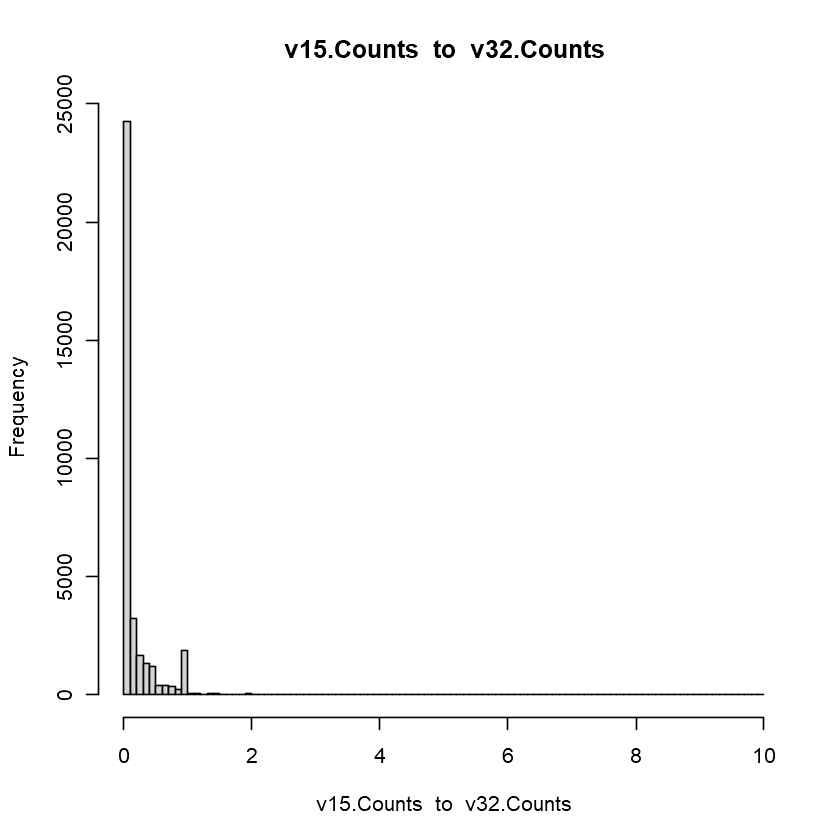

In [12]:
# Histogram for genes relative changes with differences <= 10
hist(difference2, main = name, xlab = name, nclass=100)

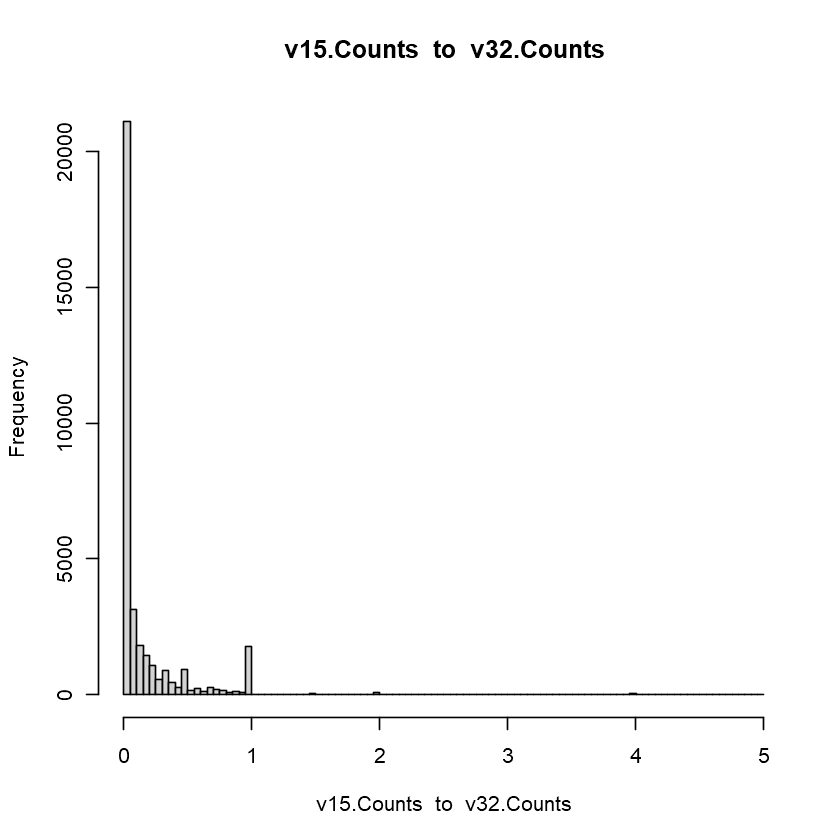

In [13]:
# Histogram for genes relative changes with differences <= 5
rm.ind <- which (difference > 5)
difference3 <- difference[-rm.ind]
hist(difference3, main = name, xlab = name, nclass=100)

# Create spreadsheet of gene's relative changes and absolute values

File created have three additional columns:
- **relative_change_v15tov32**: Relative change calculated by abs(v32 - v15)/v15 counts.
- **relative_change_v32tov15**: Relative change calculated by abs(v32 - v15)/v15 counts.
- **absolute_change**: Absolute change calculated by abs(v32 - v15).

Genes from either v15 or v32 that are below 10 in counts get an **NA** value in the relative change calculations.

In [14]:
# Add relative change values to the dataframe (new - original) / original
combined.expanded <- combined %>% mutate(relative_change_v15tov32 = ifelse((v15.Counts >= 10 | v32.Counts >= 10), abs(v32.Counts - v15.Counts) / v15.Counts, NA)) %>% # v32 - v15 / v15
                                  mutate(relative_change_v32tov15 = ifelse((v15.Counts >= 10 | v32.Counts >= 10), abs(v15.Counts - v32.Counts) / v32.Counts, NA)) %>% # v15 - v32 / v32
                                  mutate(absolute_change = abs(v15.Counts - v32.Counts))
combined.expanded

genes,symbol,v15.Counts,v32.Counts,relative_change_v15tov32,relative_change_v32tov15,absolute_change
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>
ENSG00000000003,TSPAN6,6,6,NA,NA,0
ENSG00000000005,TNMD,0,0,NA,NA,0
ENSG00000000419,DPM1,929,913,0.01722282,0.01752464,16
ENSG00000000457,SCYL3,777,667,0.14157014,0.16491754,110
ENSG00000000460,C1orf112,691,616,0.10853835,0.12175325,75
ENSG00000000938,FGR,11509,11232,0.02406812,0.02466168,277
ENSG00000000971,CFH,62,57,0.08064516,0.08771930,5
ENSG00000001036,FUCA2,1898,1231,0.35142255,0.54183591,667
ENSG00000001084,GCLC,1708,1457,0.14695550,0.17227179,251


In [15]:
# Make file spreadsheet in csv format
write.csv(combined.expanded, file = "TCGA-AB-2828 v15 vs v32 diffs.csv", row.names = F)